<a href="https://colab.research.google.com/github/Karan-dev-cyber/CNN/blob/master/GenderRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# import libraries
#

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm_notebook
from requests import get
import io
from PIL import Image

# tensorflow libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# evaluation libraries
from sklearn.metrics import classification_report

In [ ]:
#
# Define Source
#

source = "C:\\Users\\Karan\\Downloads\\MaleFemale\\Dataset"
train_dir = os.path.join(source,'Train')
test_dir = os.path.join(source,'Test')

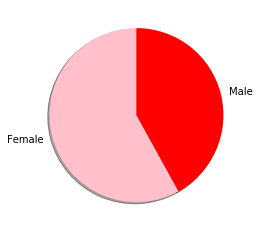

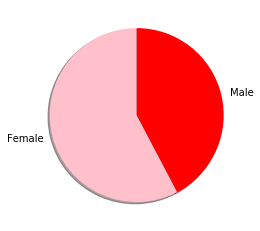

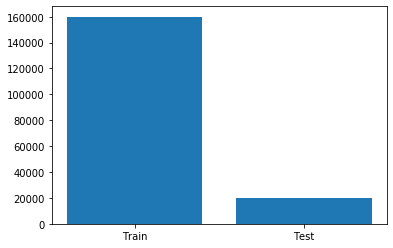

In [ ]:
#
# check balance
#
def check_balance(source):
    train_dir = os.path.join(source,'Train')
    test_dir = os.path.join(source,'Test')
    
    classes = os.listdir(train_dir)
    train_data= []
    test_data = []
    for opt in classes:
        train_path = os.path.join(train_dir,opt)
        test_path = os.path.join(test_dir,opt)
        
        train_data.append(len(os.listdir(train_path)))
        test_data.append(len(os.listdir(test_path)))
    
    plt.pie(train_data,labels = classes,startangle = 90,shadow = True,colors = ['pink','red'])
    plt.show()
    
    plt.pie(test_data,labels = classes,startangle = 90,shadow = True,colors = ['pink','red'])
    plt.show()
    
    plt.bar(['Train','Test'],[sum(train_data),sum(test_data)])
    plt.show()

check_balance(source)

# DATA seems to be a bit unbalanced

In [ ]:
# 
# Check Dimensionality
#

def check_dim(train_dir):
    dim1 = []
    dim2 = []
    dim3 = []
    
    classes = os.listdir(train_dir)
    for opt in classes:
        main_path = os.path.join(train_dir,opt)
        files = os.listdir(main_path)
        for num,file in tqdm_notebook(enumerate(files),total = len(files)):
            image_path = os.path.join(main_path,file)
            
            image = plt.imread(image_path)
            d1,d2,d3 = image.shape
            dim1.append(d1)
            dim2.append(d2)
            dim3.append(d3)
    
    print('Dimenions :',(sum(dim1)/len(dim1),sum(dim2)/len(dim2),sum(dim3)/len(dim3)))

check_dim(train_dir)

C:\Users\Karan\anaconda3\lib\site-packages\ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Dimenions : (218.0, 178.0, 3.0)


In [ ]:
# 
# Generators
#

img_gen = ImageDataGenerator(rescale = 1/255,
                            
                            )

train_gen = img_gen.flow_from_directory(train_dir,
                                       color_mode = 'rgb',
                                       class_mode = 'binary',
                                       target_size = (130,130))
test_gen = img_gen.flow_from_directory(test_dir,
                                      color_mode = 'rgb',
                                      class_mode = 'binary',
                                      target_size = (130,130),
                                      shuffle = False)

Found 160000 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.


In [ ]:
#
# Build the model
#

model = Sequential()

model.add(Conv2D(filters = 32,
                kernel_size = (3,3),
                activation = 'relu',
                input_shape = (130,130,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,
                kernel_size = (3,3),
                activation = 'relu',
                input_shape = (130,130,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,
                kernel_size = (3,3),
                activation = 'relu',
                input_shape = (130,130,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)            

In [ ]:
# early stopping to avoid overfitting
stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [ ]:
# Fit the model

model.fit(train_gen,
         validation_data = test_gen,
         epochs = 5,
         callbacks = [stop])

Epoch 1/5
5000/5000 [==============================] - 11484s 2s/step - loss: 0.1415 - accuracy: 0.9425 - val_loss: 0.0829 - val_accuracy: 0.9708
Epoch 2/5
5000/5000 [==============================] - 9471s 2s/step - loss: 0.0863 - accuracy: 0.9672 - val_loss: 0.0714 - val_accuracy: 0.9723
Epoch 3/5
5000/5000 [==============================] - 9602s 2s/step - loss: 0.0706 - accuracy: 0.9733 - val_loss: 0.0579 - val_accuracy: 0.9782
Epoch 4/5
5000/5000 [==============================] - 8634s 2s/step - loss: 0.0594 - accuracy: 0.9785 - val_loss: 0.0651 - val_accuracy: 0.9752
Epoch 5/5
5000/5000 [==============================] - 8592s 2s/step - loss: 0.0495 - accuracy: 0.9819 - val_loss: 0.0637 - val_accuracy: 0.9763


In [ ]:
#
# Evaluate
#

#{'Female': 0, 'Male': 1}
y_pred = model.predict_classes(test_gen)
y_true = test_gen.classes
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11542
           1       0.97      0.97      0.97      8459

    accuracy                           0.98     20001
   macro avg       0.98      0.98      0.98     20001
weighted avg       0.98      0.98      0.98     20001



In [ ]:
#
# Face Detection Setup
#

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def detect_faces(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    data = face_cascade.detectMultiScale(gray,
                                         minNeighbors = 5,
                                         scaleFactor = 1.1)
    faces = []
    for face in data:
        x,y,w,h = face
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,200,0),2)
        faces.append(image[y:y+h,x:x+w])
        font                   = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (int(x+w/2),int(y+h))
        fontScale              = 0.5
        fontColor              = (200,0,0)
        lineType               = 2

        cv2.putText(image,'Face', 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            lineType)
    return image,faces

In [ ]:
#
# Check For Validation
#

validation_dir = os.path.join(source,'Validation')

val_gen = img_gen.flow_from_directory(validation_dir,
                                     class_mode = 'binary',
                                     color_mode = 'rgb',
                                     target_size = (130,130),
                                     shuffle = False)
y_pred = model.predict_classes(val_gen)
y_true = val_gen.classes

print(classification_report(y_true,y_pred))

Found 22598 images belonging to 2 classes.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13778
           1       0.97      0.96      0.96      8820

    accuracy                           0.97     22598
   macro avg       0.97      0.97      0.97     22598
weighted avg       0.97      0.97      0.97     22598



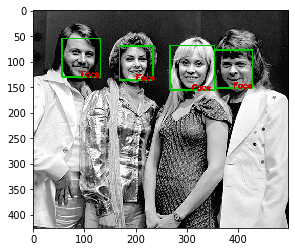

In [ ]:
#
# Check if face detector works
#
image = cv2.imread("C:\\Users\\Karan\\Pictures\\ML\\abba.png")
image,faces = detect_faces(image)

plt.imshow(image)
plt.show()

In [ ]:
# 
# Online Images
#

def get_web():
    target = 'Images\\GenderRec.png'
    url = input('URL ')
    response = get(url)
    image_path = io.BytesIO(response.content)
    image = Image.open(image_path)
    image.save(target)
    image = cv2.imread(target)
    image = cv2.resize(image,(218, 178))
    return image

def face_predict(image):
    
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    data = face_cascade.detectMultiScale(gray,
                                         minNeighbors = 5,
                                        scaleFactor = 1.3,
                                         minSize = (60,60)
                                        )
    
    df = {0:'Female',
          1:'Male'}
    faces = []
    for face in data:
        x,y,w,h = face
#         del_y1 = int((40*image.shape[1])/218)
#         del_y2 = int((10*image.shape[1])/218)
#         del_x1 = int((10*image.shape[0])/178)
#         del_x2 = int((10*image.shape[0])/178)
        del_y1 = 40
        del_y2 = 10
        del_x1 = 20
        del_x2 = 20
        
        image = cv2.rectangle(image,(max(1,x-del_x1),max(1,y-del_y1)),(x+w+del_x2,y+h+del_y2),(0,200,0),2)
        img = image[max(0,y-del_y1):y+h+del_y2,max(0,x-del_x1):x+w+del_x2]
        plt.imshow(image)
#         print(max(0,y-del_y1),max(,y+h+del_y2),max(0,x-del_x1),max(0,x+w+del_x2))
        img = cv2.resize(img,(130,130))
        img = img/(np.max(img) - np.min(img))
#         print(np.max(img))
        
        pred = model.predict_classes(img.reshape(1,130,130,3))
        font                   = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (int(x+w/2),int(y+h))
        fontScale              = 0.5
        fontColor              = (200,0,0)
        lineType               = 2

        cv2.putText(image,df[pred[0,0]], 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            lineType)
        
#     print(df[pred[0,0]])
    return image,faces

In [ ]:
#
# Web Cam
#

def capture_image():
    cam = cv2.VideoCapture(0)
    boolean,image = cam.read()
    del cam
    return image


(218, 178, 3)


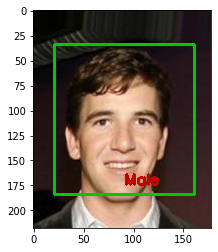

In [ ]:
# test on image
#test 1
image = plt.imread("C:\\Users\\Karan\\Downloads\\MaleFemale\\Dataset\\Validation\\Male\\180002.jpg")
print(image.shape)
image,face = face_predict(image)
plt.imshow(image)

[[0.0819125]]


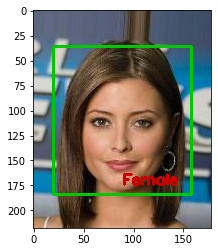

In [ ]:
# test 2
image = plt.imread("C:\\Users\\Karan\\Downloads\\MaleFemale\\Dataset\\Validation\\Female\\180056.jpg")
image,face = face_predict(image)
plt.imshow(image)
print(prob)

URL https://specials-images.forbesimg.com/imageserve/5f0b7660c1b9bd0007506166/960x0.jpg?fit=scale


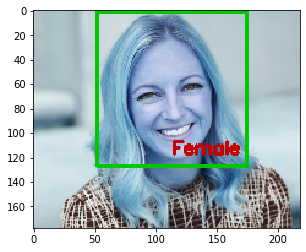

In [ ]:
# Test for online images
image = get_web()
plt.imshow(image)
image,face= face_predict(image)
plt.imshow(image)

URL https://www.wallpaperup.com/uploads/wallpapers/2013/05/26/92638/aafbbfe3a9554eb1b7f58a397b86369b-700.jpg


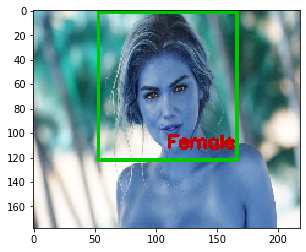

In [ ]:
# Test for online images
image = get_web()
plt.imshow(image)
image,face= face_predict(image)
plt.imshow(image)

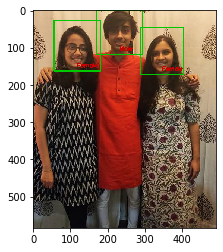

In [ ]:
# Instagram Images
# Test 1
image = plt.imread("C:\\Users\\Karan\\Pictures\\ML\\Ninad.JPG")
image,face = face_predict(image)
plt.imshow(image)

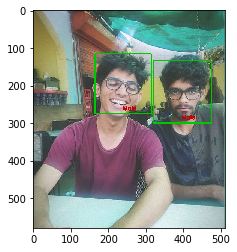

In [ ]:
# Test 2
image = plt.imread("C:\\Users\\Karan\\Pictures\\ML\\Mehak.JPG")
image,face = face_predict(image)
plt.imshow(image)

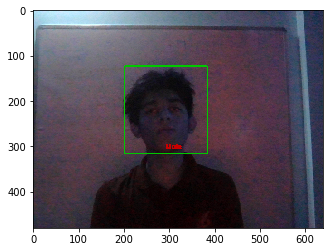

In [ ]:
# Web Cam
image = capture_image()
image,face = face_predict(image)
plt.imshow(image)

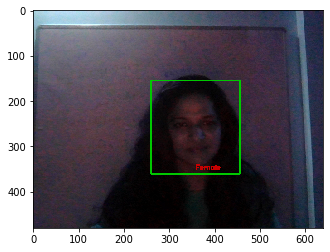

In [ ]:
# Test 2
image = capture_image()
image,face = face_predict(image)
plt.imshow(image)

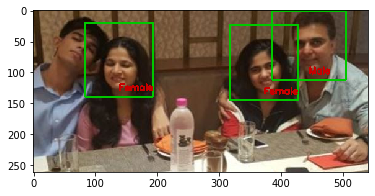

In [ ]:
# Whatsapp images
image = plt.imread("C:\\Users\\Karan\\Pictures\\ML\\Family.JPG")
image,face = face_predict(image)
plt.imshow(image)

In [ ]:
#
# Dealing with Videos
#

def video_capture(path):
    cam = cv2.VideoCapture(path)
    w  = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fc = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cam.get(cv2.CAP_PROP_FPS))
    frames = np.empty((fc,h,w,3),dtype = 'uint8')
    
    for i in range(fc):
        boolean,frame = cam.read()
        frames[i] = frame
    return frames,fps

def vid_face(frames):
    for i in range(len(frames)):
        frame,faces = face_predict(frames[i])
        frames[i] = frame
    return frames

In [ ]:
frames,fps = video_capture("C:\\Users\\Karan\\Downloads\\Modern Family Intro Time Lapse - All Seasons.mp4")